# JUnit によるTestの自動化(1)

勉強会資料、2017年12月

自己紹介  

張　森
（ちょう　もり）

五月入社、業界経験７か月

- OCNメールでテスト（単体とselenium）
- 今はフロンティアのWEB案件始まったばかり
- ちょくちょく他プロジェクトのお手伝い

<div style="text-align:center;margin:2em;">
「テストは現場のベテランに任せている。彼らでないとモチベーション維持できない」  
（●●重工の人）
</div>


- テストは重要（？）
    - 実際はどれぐらいリソースをかけている？なぜ？
    - 本当はどういうテストをすべきなの？
    - test効率化：作業効率化・テスト設計
- テストが必要
    - バグを見つけるのが遅れて痛い目にあったことがある
    - 自動化できたらうれしいことが結構ある

# 今日の予定

- Junitについて
    - 基本
    - 嬉しい機能
- テストコードについて
    - 本当のところどうなの？

# JUnit

## JUnit - ファーストインパクト

- 開発環境でプロジェクト作るとおまけでついてくる「アレ」
- そのせいでビルドが落ちる時がある（そしてtest結果を無視するように設定をする）

<div style="text-align:center;margin:2em;font-size:1.5em;">Junit、ちょっと迷惑なやつ</div>

<div style="text-align:center">
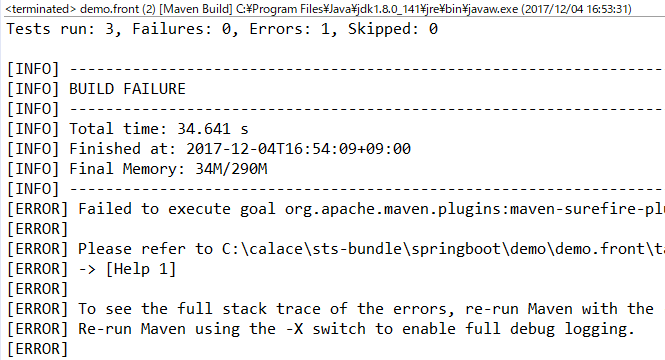
</div>

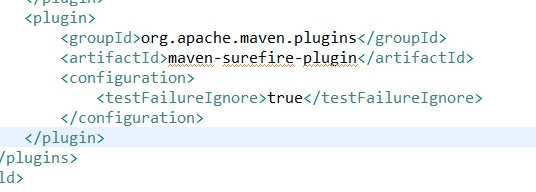

## JUnit - セカンドインパクト

- Warファイルを作ってTomcatにあげると「ClassNotFound」
- ローカルではちゃんと動く
- Javaって「Write Once, Run everywhere」じゃなかったの？

→　IDEが器用すぎることがある?  
（プロジェクト分割でconfigureクラスの書き方が間違っていた）

<div style="text-align:center;margin:2em">
エラーメッセージを読むと、実はJUnitが同じエラーを出していた。
</div>

<div style="text-align:center;font-size:2em">Junit、実はいいやつ</div>

<div style="text-align:center;margin-top:2em">
「JUnit、コノヤロウ」⇒「JUnit、ありがとう」
</div>

## JUnit、使ってみる



In [2]:
1999+2147483647;

-2147481650

In [48]:
Random rnd = new Random();
rnd.nextInt();

1970144671

In [3]:
float a=0.1;
float b=0.2;
a+b;

0​.30000000447034836

In [4]:
float a=0.1;
float b=0.2;
b+a;

0​.30000000447034836

In [1]:
println("aaa")

aaa


No Outputs

In [39]:
#@dependency(group="org.springframework", module="spring-orm", version="3.2.5.RELEASE")

No Outputs

In [40]:
#@dependency(group="org.springframework.security", module="spring-security-core", version="4.2.3.RELEASE")

No Outputs

In [41]:
import org.springframework.security.crypto.password.PasswordEncoder;

No Outputs

**assertもいろいろ**
- assertEquals(expected, actual);
- assertNotEquals(,);
- assertTrue(someBooleanExpression);
- assertFalse();
- assertNull();
- assertNotSame(Object unexpected, Object actual); *同じオブジェクトかどうか
- ...

**assertThatが便利**
- assertThat(value,is(expected))
- assertThat(account.getName(), startsWith(​"xyz"​));
- assertThat(obj, hasProperty(property, is(value)))
- ...

** @Before、@After で共通処理を**

開始前の処理（インスタンス生成、データ呼び出し、ブラウザ立ち上げ、ログインなど）

終わった後の処理（データ初期化、ブラウザ閉じるなど）

実際のプロジェクトで

- エラーが出た時、問題を特定しやすいように配慮（一つのテストケースで一つのことをテストするのが理想）
- ~~Springフレームワークだといろいろめんどくさい~~
- Springフレームワークがテストコードを支援するためのツールをいろいろ用意してくれている
- Mockが必要
- ~~テストしやすいようにと考えると余計なクラスが増えることもある~~
- いわゆる「良いコード」（疎結合・依存関係が簡単）はテストしやすい傾向がある


課題：

- MybatisのDBの設定（テスト環境）
- Mockitoの詳細
- TemplateEngine/Controller(MockMvc?)
- ...

第二弾「"Junit によるUnitTestの自動化(2)Springとの組み合わせ"」のお楽しみ

# Unittest

<div style="text-align:center">
Why Most Unit Testing is Waste
</div>
<div style="text-align:center"> - Rex Black</div>


<div style="text-align:right;margin-top:1em">
https://rbcs-us.com/documents/Why-Most-Unit-Testing-is-Waste.pdf
</div>

<div style="text-align:center">
えっ？単体テストコードは（ほとんどの場合）裸の王様だったの？
</div>

- カバレッジ
    - FORTRANの時代は有意義だったかもしれないが、オブジェクト指向で意味あるの？
- 維持コストは馬鹿にならない
    - 普通にテストした方がいい？
- ビジネス価値はほとんどない
    - 「要件から導出されたテストだけがビジネス価値を持つ」
- デザインに害を及ぼす
    - プログラムを過剰に細分化してしまう
- …

- Q1:
    - プロジェクトでどれくらいテストコードを書いていますか
- Q2：
    - テストコードを書いてよかったと思った経験は？
- Q3:
    - テストコードを書くべきだと思うときは？

How deep are your unit tests?  
(historical significance)

https://stackoverflow.com/questions/153234/how-deep-are-your-unit-tests

オオモノ（Kent Beck）の回答：

**I get paid for code that works, not for tests**, so my philosophy is to **test as little as possible to reach a given level of confidence** (I suspect this level of confidence is high compared to industry standards, but that could just be hubris). **If I don't typically make a kind of mistake (like setting the wrong variables in a constructor), I don't test for it**. I do tend to make sense of test errors, so I'm extra careful when I have logic with complicated conditionals. When coding on a team, I modify my strategy to carefully test code that we, **collectively, tend to get wrong**.

Different people will have different testing strategies based on this philosophy, but that seems reasonable to me given the immature state of understanding of how tests can best fit into the inner loop of coding. **Ten or twenty years from now we'll likely have a more universal theory** of which tests to write, which tests not to write, and how to tell the difference. **In the meantime, experimentation seems in order**.

<div style="text-align:center;margin:2em">
一般論　⇒　実験
</div>

<div style="text-align:center;margin:2em">
理論通りに行かないから面白い？
</div>



https://www.facebook.com/notes/kent-beck/rip-tdd/750840194948847

https://ubiteku.oinker.me/2015/08/10/rip-tdd/

Sogeti Nederland B.V.  
the tests are more complex than the actual code
 
A Response to “Why Most Unit Testing is Waste”  
http://blog.stevensanderson.com/2009/11/04/selective-unit-testing-costs-and-benefits/ 

Selective Unit Testing – Costs and Benefits  
https://henrikwarne.com/2014/09/04/a-response-to-why-most-unit-testing-is-waste/